# Natural Language Processing

Attempt to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

Data: [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
# Import the libraries
# Pandas is high-performance, easy-to-use data structures and data analysis tools for the Python programming language
import pandas as pd

# Numpy is the fundamental package for scientific computing with Python
import numpy as np

# Matplotlib is used for graphs
import matplotlib.pyplot as plt

# seaborn Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
import seaborn as sns

# %matplotlib inline is magic command. This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib
%matplotlib inline

In [2]:
# Reading yelp.csv File 
yelp = pd.read_csv('yelp.csv')

In [3]:
# To view first 5 rows of our dataset
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
# To know data type and non null values in a data frame
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
# Describe function provide descriptive statistics Output table of data 
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:

sns.set_style('white')


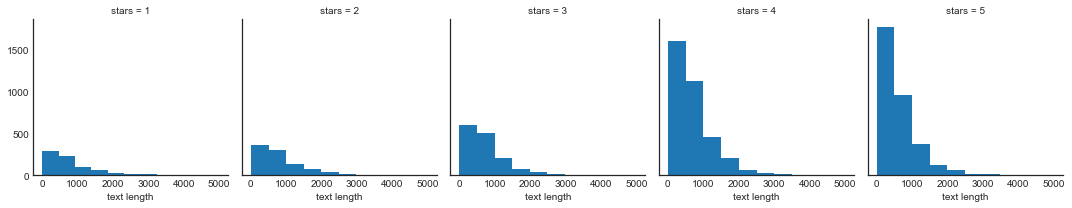

In [8]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

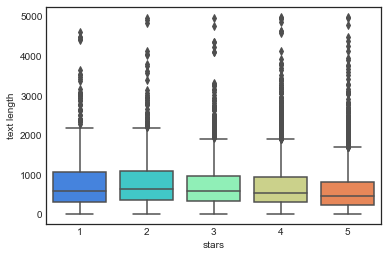

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

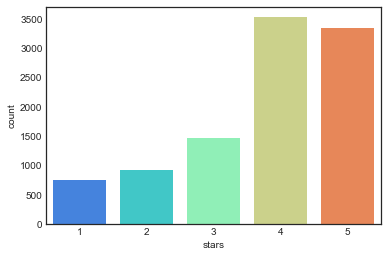

In [10]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [11]:
stars = yelp.groupby('stars').mean()

In [12]:
# Creating Correlation matrix
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


In [13]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [14]:
# Dividing independent variables and target variable
X = yelp_class['text']
y = yelp_class['stars']

In [15]:
# Function to vectorize each message
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [16]:
X = cv.fit_transform(X)

In [17]:
# Importing train_test_split() for the purpose of spliting the data into test and train sets
from sklearn.model_selection import train_test_split

In [18]:
# spliting the data into test (30 percent) and train sets (70 percent) with 101 random state
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [19]:
# Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [20]:
# Specifying a variable to Naive Bayes classifier () & Creating model
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
# Predicting test set
predictions = nb.predict(X_test)

In [22]:
# Importing metrics function to see our prediction accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [24]:
# After the counting, the term weighting and normalization can be done with TF-IDF
from sklearn.feature_extraction.text import  TfidfTransformer

In [25]:
# Pipeline function to apply all tranformation and model at once
from sklearn.pipeline import Pipeline

In [26]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [27]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [28]:
# Creating model using train set
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [29]:
# Predicting test set
predictions = pipeline.predict(X_test)

In [30]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
